<a href="https://colab.research.google.com/github/Lamia-BenHassen/food-sales-predictions/blob/main/Project_1_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 2**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
filename='/content/sales_predictions_2023.csv'
df=pd.read_csv(filename)

In [4]:
#nb of rows and columns (rows,columns)
df.shape

(8523, 12)

In [5]:
#datatypes
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
#any duplicates?
df.duplicated().sum()

0

In [7]:
#missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
# Item_Weigt and Outlet_Identifier are showing a lot of missing data maybe, it might be worth just dropping it
df.drop(columns=['Item_Weight','Outlet_Size'], inplace=True)
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

finding and fixing inconsistent categories of data

In [9]:
object=df.dtypes[df.dtypes=='object'].index
object

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [10]:
for column in object:
  print(f"{column}:")
  print(df[column].value_counts(dropna=False))


Item_Identifier:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555


In [11]:
#in the Item_Fat_Content : LF and low fat mean Low Fat and reg means Regular
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content']=df['Item_Fat_Content'].replace('reg','Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

the summary statistics

In [12]:
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


#**part 3**

In [ ]:
df.sample(3)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5883,DRQ35,Low Fat,0.042464,Hard Drinks,121.9388,OUT018,2009,Tier 3,Supermarket Type2,1114.5492
4679,NCN19,Low Fat,0.012097,Others,188.8530,OUT035,2004,Tier 2,Supermarket Type1,3225.8010
4199,FDL36,Low Fat,0.127335,Baking Goods,88.2830,OUT010,1998,Tier 3,Grocery Store,89.8830


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Count')

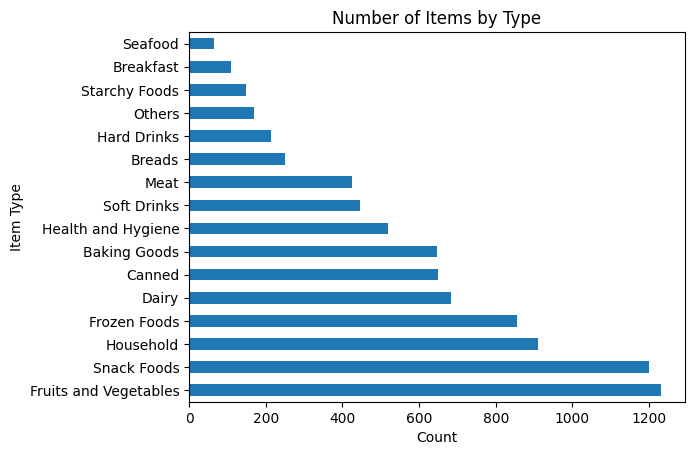

In [ ]:
df['Item_Type'].value_counts().plot(kind='barh')
plt.title('Number of Items by Type')
plt.ylabel('Item Type')
plt.xlabel('Count')

the frequent types in this dataframe are fruits and vegetables and snack foods

In [14]:
df_fruit_veg=df['Item_Type']=='Fruits and Vegetables'

In [15]:
df_reg=df['Item_Fat_Content']=='Regular'

In [16]:
df_fruit_veg_reg=df.loc[df_fruit_veg & df_reg ,:]

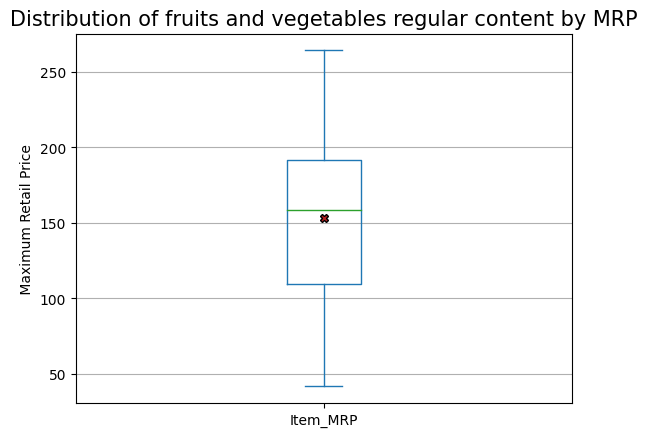

In [19]:
df_fruit_veg_reg['Item_MRP'].plot(kind='box',showmeans = True,meanprops =dict(marker='X', markeredgecolor='black', markerfacecolor='firebrick'))
plt.ylabel(' Maximum Retail Price ')
plt.title('Distribution of fruits and vegetables regular content by MRP', fontsize=15)
plt.grid(axis='y')

The Maximum Retail Price of fruits and vegetables regular content varies between 41 and 265, approximately, and its average value is around 153.

In [ ]:
avg=df_fruit_veg_reg.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
avg

Outlet_Type
Grocery Store         317.562535
Supermarket Type1    2599.931972
Supermarket Type2    1975.740694
Supermarket Type3    4308.839134
Name: Item_Outlet_Sales, dtype: float64

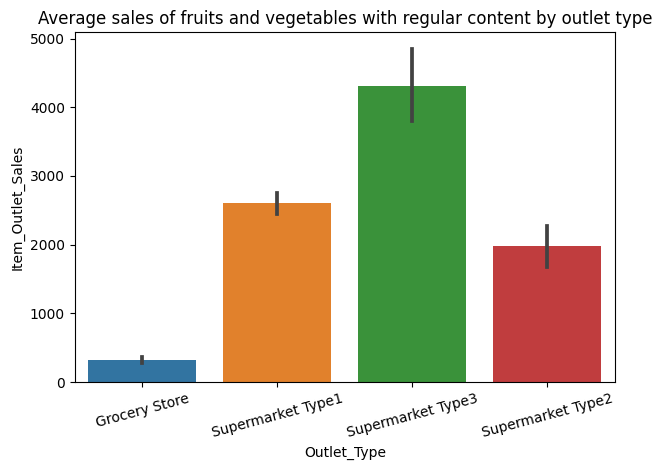

In [34]:
fig,ax = plt.subplots()
sns.barplot(data=df_fruit_veg_reg, x='Outlet_Type', y='Item_Outlet_Sales')
plt.xticks(rotation=15)
plt.title('Average sales of fruits and vegetables with regular content by outlet type')
fig.tight_layout()

The average sales of fruits and vegetables with regular content are significantly higher in supermarket type 3, representing more than 13 times the average sales in the grocery store.


<ipython-input-37-2adeea126729>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="crest", annot=True)


<Axes: >

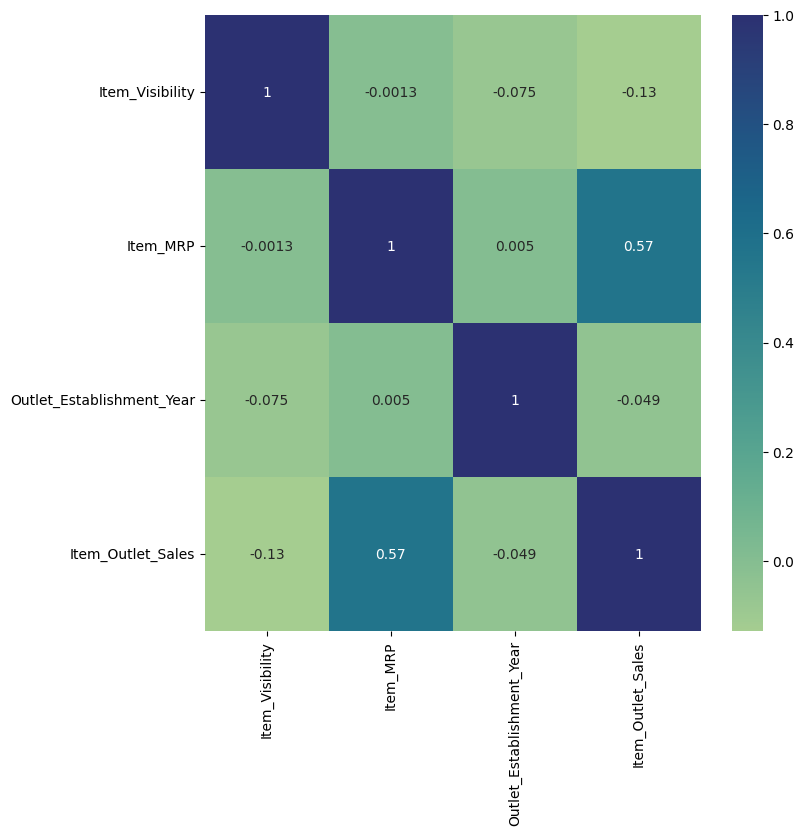

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), cmap="crest", annot=True)


a correlation coefficient of 0.57 suggests a positive relationship between Item_outlet_sales and Item_MRP

Part 4

Text(0.5, 1.0, 'Average sales of items by outlet type')

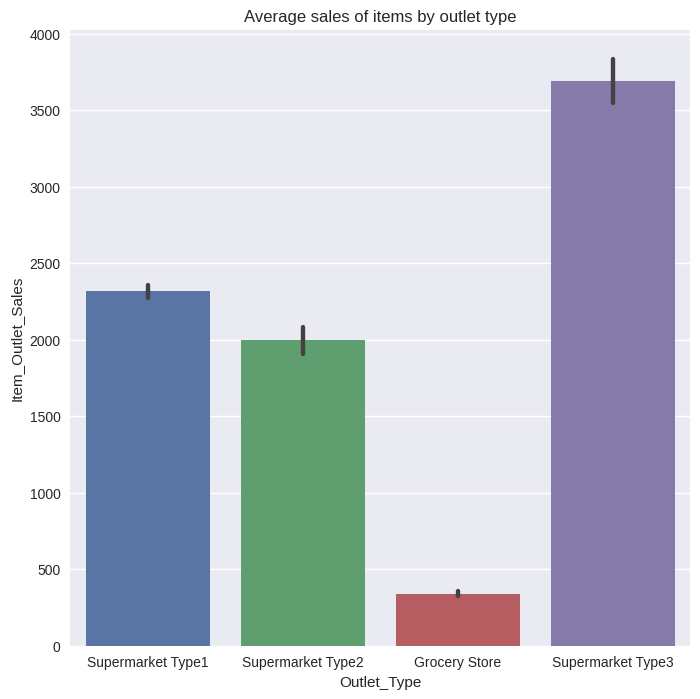

In [71]:
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(data=df,x='Outlet_Type',y='Item_Outlet_Sales')
plt.title('Average sales of items by outlet type')

always The average sales of Items is significantly higher in supermarket type 3 more then average sales in the grocery store and all the other types

In [44]:
 df_supermarket_type3=df.loc[df['Outlet_Type']=='Supermarket Type3']

Text(0.5, 1.0, 'Distribution Supermarket Type3 in location')

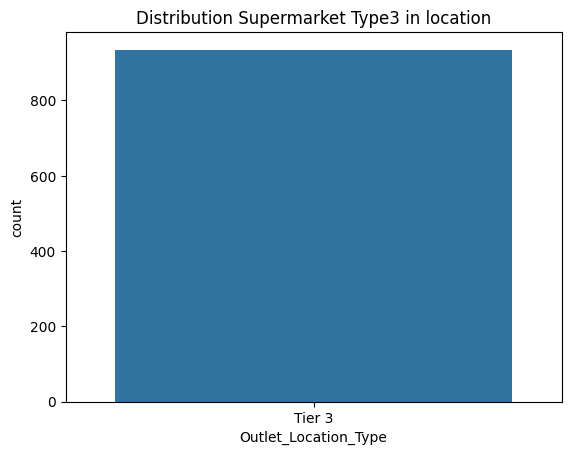

In [52]:
sns.countplot(data=df_supermarket_type3, x='Outlet_Location_Type')
plt.title('Distribution Supermarket Type3 in location')

Supermarket type 3 is located exclusively in Tier 3.It appears that Tier 3 is associated with higher prices or is considered a more expensive tier.

---








In [60]:
type_fat_sales = pd.DataFrame(df.groupby(['Item_Type', 'Item_Fat_Content', 'Item_Identifier'])['Item_Outlet_Sales'].mean())

In [61]:
data1 =type_fat_sales.reset_index().groupby(['Item_Type', 'Item_Fat_Content'])['Item_Outlet_Sales'].apply(list)

In [64]:
data1=data1.reset_index()

In [66]:
reg_filter=data1['Item_Fat_Content'] == 'Regular'

In [67]:
regtype=data1.loc[reg_filter,:]

<ipython-input-70-eb4de326cbb3>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Item outlet sales for item type regular content')

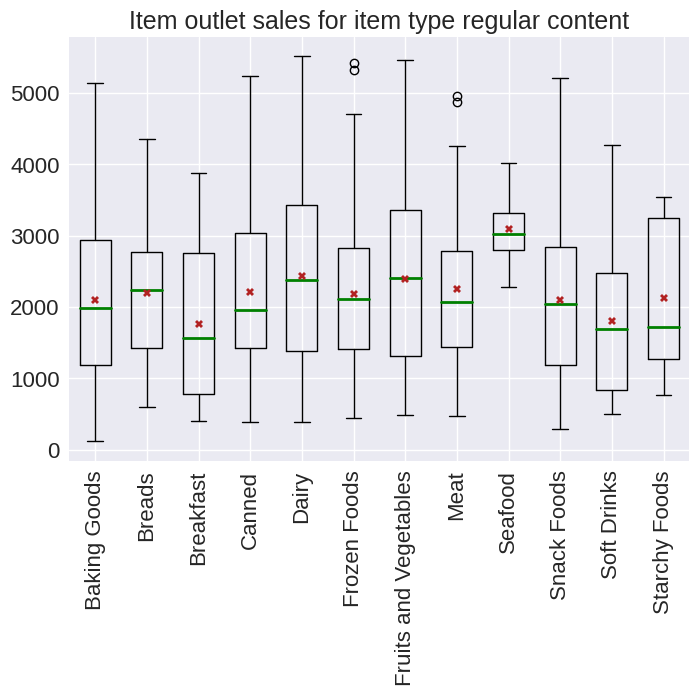

In [70]:
plt.style.use('seaborn')
indexList = []
for index, heights in enumerate(regtype['Item_Outlet_Sales'].values):
  plt.boxplot(regtype['Item_Outlet_Sales'].values[index],
              positions = [index],
              widths = .6,
              medianprops = dict(linestyle='-', linewidth=2, color='green'),
              showmeans = True,
              meanprops =dict(marker='X', markeredgecolor='black', markerfacecolor='firebrick'))
  indexList.append(index)
plt.xticks(indexList,regtype['Item_Type'].values, fontsize = 16, rotation = 90)
plt.yticks(fontsize = 16)
plt.title('Item outlet sales for item type regular content', fontsize = 18)